### importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Cleaned Dataset

In [ ]:
df=pd.read_csv('cleaned_algerian_forest_fires.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


## Data Cleaning & Preprocessing


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
# drop month day and year

df.drop(['month','day','year'],axis=1,inplace=True)

In [ ]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [ ]:
#encoding

df['Classes']=df['Classes'].map({'fire':1,'not fire':0})


In [ ]:
df.columns=df.columns.str.lower()
df.columns

Index(['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'classes', 'region'],
      dtype='object')

In [ ]:
df['classes'].value_counts()

,count
classes,
1,137
0,106


FWI tells how dangerous the weather is for forest fires.

In [ ]:
X=df.drop('fwi',axis=1)
y=df['fwi']

In [ ]:
X

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [ ]:
y

,fwi
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,y_train.shape

((182, 11), (182,))

In [ ]:
X_test.shape,y_test.shape

((61, 11), (61,))

### feature selection based on correlation


In [ ]:
X_train.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
rh,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
ffmc,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
dmc,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
dc,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
isi,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
bui,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


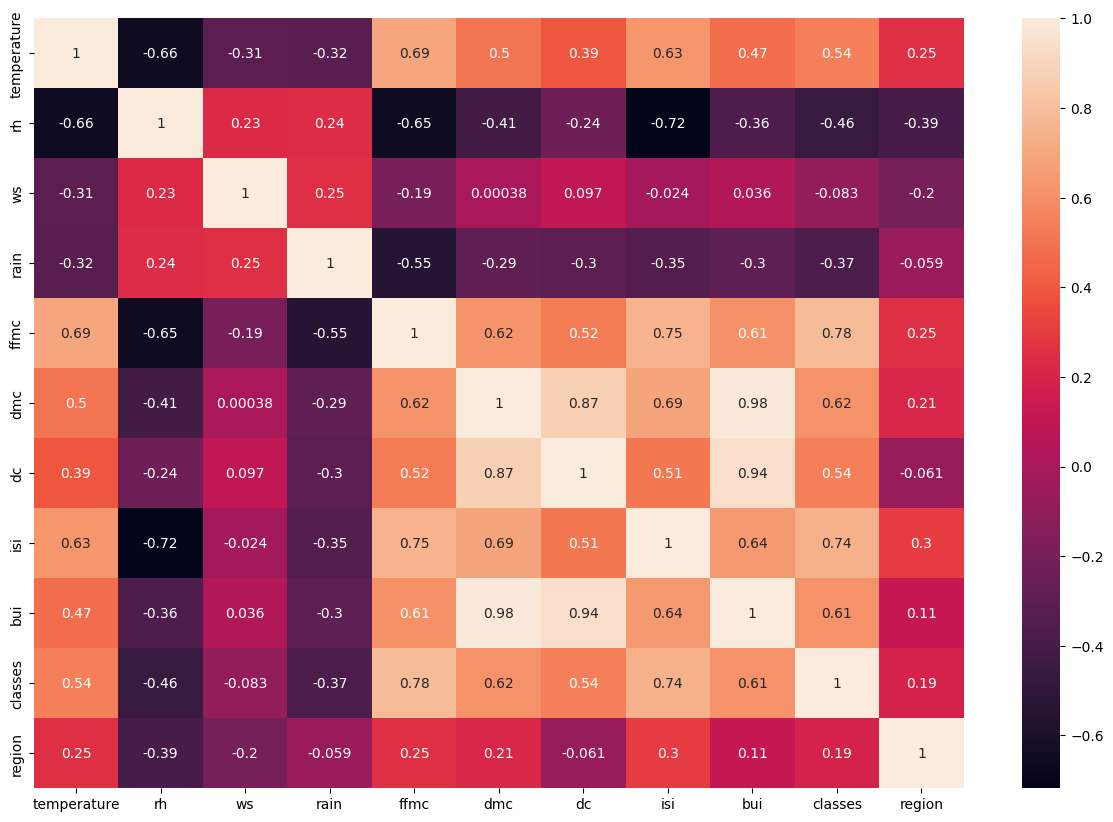

In [ ]:
# check for multicolinearity
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [ ]:
def correlation(df,threshold):
  col_corr=set()
  df_corr=df.corr()

  for i in range(len(df_corr.columns)):
    for j in range(i):
      if abs(df_corr.iloc[i,j])>threshold:
        colname=df_corr.columns[i]
        col_corr.add(colname)
  return col_corr



In [ ]:
highly_correlated_85=correlation(X_train,0.85)

In [ ]:
X_train.drop(highly_correlated_85,axis=1,inplace=True)


In [ ]:
X_train

,temperature,rh,ws,rain,ffmc,dmc,isi,classes,region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [ ]:
X_test.drop(highly_correlated_85,axis=1,inplace=True)

In [ ]:
X_test

,temperature,rh,ws,rain,ffmc,dmc,isi,classes,region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


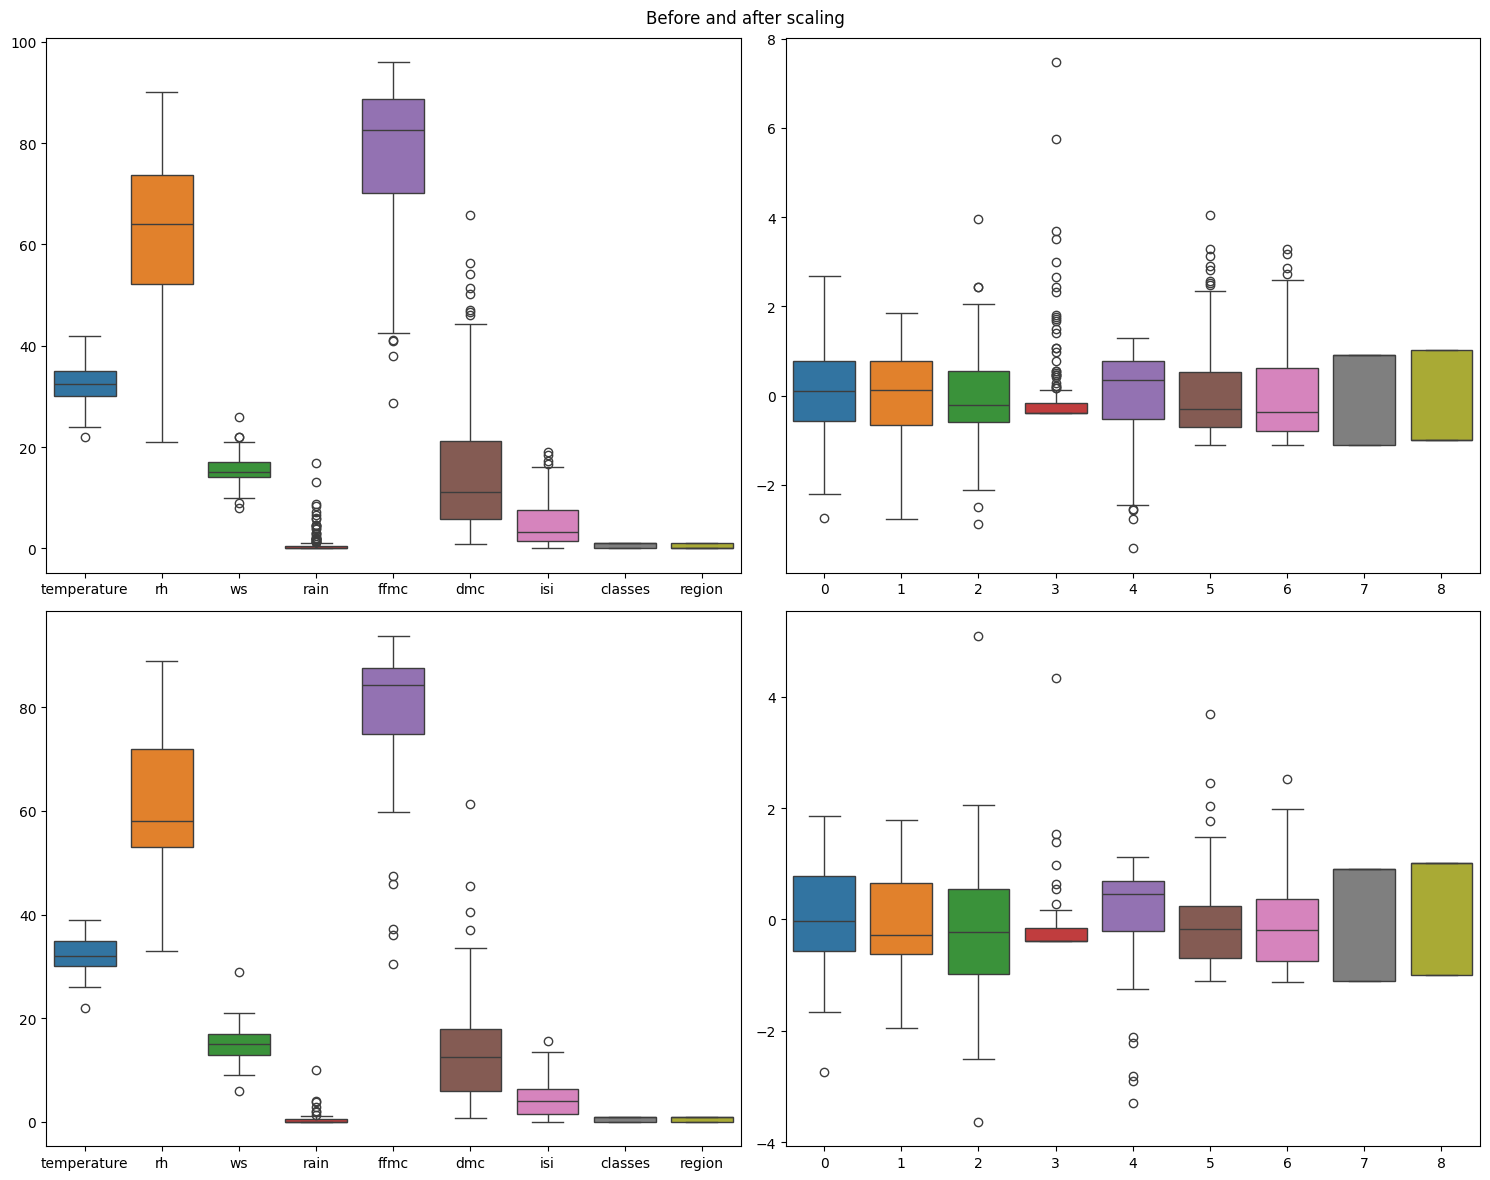

In [ ]:
plt.figure(figsize=(15,12))
plt.suptitle('Before and after scaling')
def boxplot_plotting(data,position):

  plt.subplot(2,2,position)
  sns.boxplot(data=data)

boxplot_plotting(X_train,1)
boxplot_plotting(X_train_scaled,2)
boxplot_plotting(X_test,3)
boxplot_plotting(X_test_scaled,4)

plt.tight_layout()
plt.show()



## Model Building


### Linear Regression

MSE: 0.6742766873791607
MAE: 0.5468236465249986
R2: 0.9847657384266951


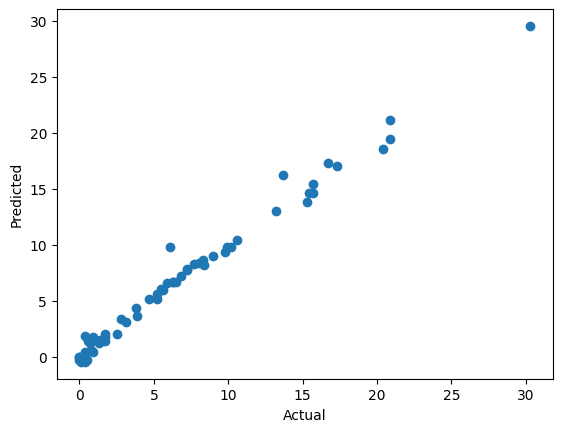

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

linear_reg=LinearRegression()
linear_reg.fit(X_train_scaled,y_train)

y_pred=linear_reg.predict(X_test_scaled)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Lasso Regression


MSE: 2.2483458918974772
MAE: 1.133175994914409
R2: 0.9492020263112388


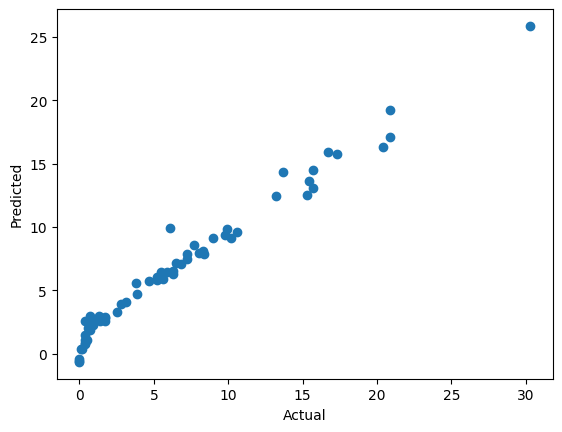

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred=lasso.predict(X_test_scaled)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Ridge Regression

MSE: 0.6949198918152074
MAE: 0.5642305340105692
R2: 0.9842993364555513


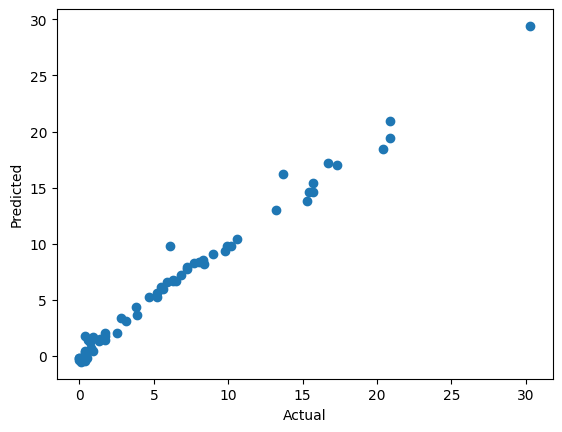

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Ridge=Ridge()
Ridge.fit(X_train_scaled,y_train)

y_pred=Ridge.predict(X_test_scaled)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### ElasticNEt

MSE: 5.5172511010252245
MAE: 1.8822353634896005
R2: 0.8753460589519703


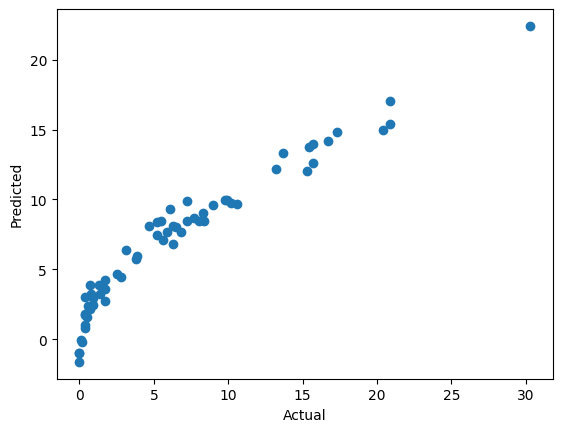

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)

y_pred=elastic.predict(X_test_scaled)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Model Evaluation & Cross Validation


### Lasso Cross Validation

MSE: 0.792499555474362
MAE: 0.619970115826343
R2: 0.9820946715928275


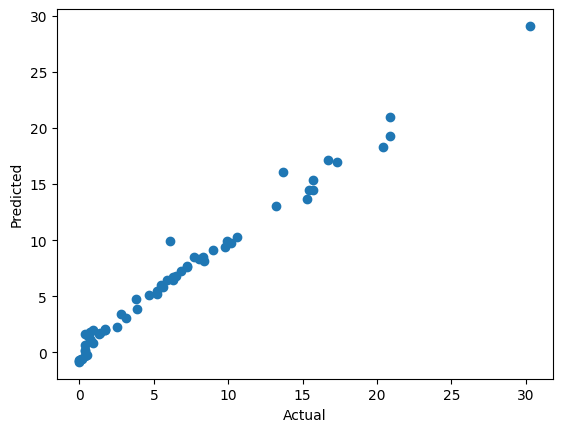

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv=LassoCV(cv=5)
lasso_cv.fit(X_train_scaled,y_train)

y_pred=lasso_cv.predict(X_test_scaled)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
lasso_cv.alpha_

np.float64(0.05725391318234408)

In [ ]:
# aplha values tried on, and out of these 0.05725 gets selected as it have less average error

lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

### Ridge Cross Validation

MSE: 0.6949198918152074
MAE: 0.5642305340105692
R2: 0.9842993364555513


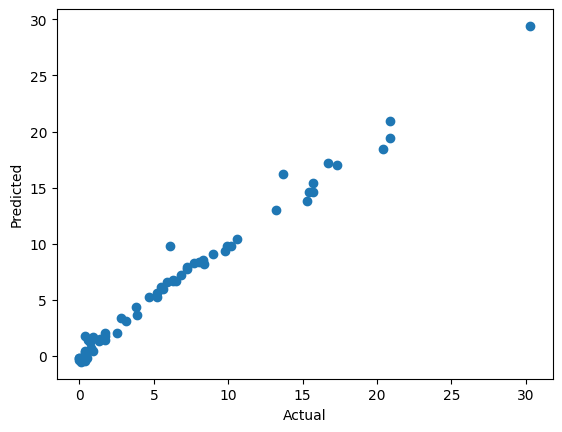

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)

y_pred=ridge_cv.predict(X_test_scaled)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### ElasticNet Cross Validation

MSE: 0.6949198918152074
MAE: 0.5642305340105692
R2: 0.9842993364555513


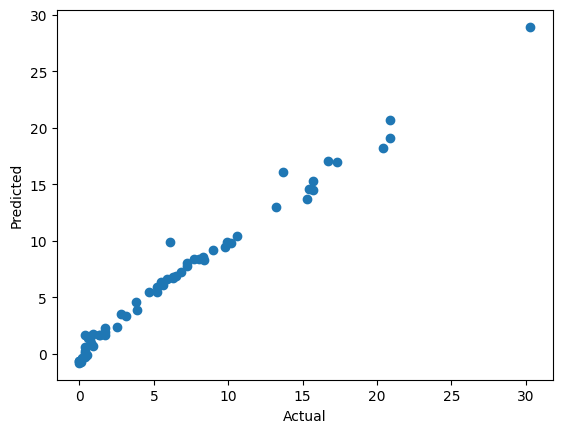

In [ ]:
from sklearn.linear_model import ElasticNetCV

elasticcv=ElasticNetCV()
elasticcv.fit(X_train_scaled,y_train)

y_pred=elasticcv.predict(X_test_scaled)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Model Performance Analysis (Residual Analysis)

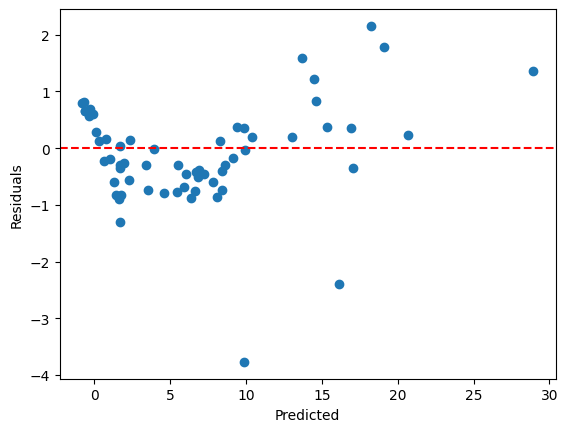

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


Residuals are randomly scattered around zero with no clear pattern,
indicating that the model fits the data well and captures the underlying trend.
